Analysis of beads imaged with the lattice light sheet
-----------------------------------------------------

The purpose of this notebook is to analyze the data produced by the previous notebook (`4.Epifluorescence beads`). The aim is to produce the following analyses:

1. Extract relevant images in a reproducible way
2. Extract PSF close-ups at various compression ratios
3. Extract line profiles of the PSF close-ups at various compression ratios
4. Compute the MSE and SSIM as a function of the compression ratio

### About input data and formats
This notebook assumes that notebook `4.Epifluorescence beads` was run for various compression ratios (using the cluster version). It also assumes that the individual images were recombined into a 16 bits TIFF image (using the included script `recombine.py` also included in `4.Epifluorescence beads`. Then, it assumes that the recombined images were saved into `p_rec = "../../5_outputs/20170321_reconstructions_tiff/epifluorescence_beads/"`.

In [3]:
%matplotlib inline
import sys, os
import numpy as np
from libtiff import TIFF
import matplotlib.pyplot as plt

sys.path.append("../../3_code/")
import cstools

fig_p = "./figures/"
p_ref = "../../4_data/epifluorescence/161010_CS_beads_mega/3_eye_3/Pos0_eye.tif" #### EDIT HERE!!!
p_rec = "../../5_outputs/20170321_reconstructions_tiff/epifluorescence_beads/"
p_prefix = "epifluorescence"
p_suffix = "..tif"


cool_frames = [126, 179, 460] # There is a one position shift compare to ImageJ/Fiji viewer (ImageJ indexes images from 1)

In [7]:
l_mes = []
l_path = []
l_im = []

for i in [i for i in os.listdir(p_rec) if i.startswith(p_prefix) and i.endswith(p_suffix)]:
    p = os.path.join(p_rec, i)
    im = cstools.read_tif(p)
    
    l_mes.append(int(i[len(p_prefix):-len(p_suffix)]))
    l_path.append(p)
    l_im.append(im)

    print "Reconstruction {} loaded".format(i)
    
## Reorder
ord = sorted(range(len(l_mes)),key=l_mes.__getitem__)
l_mes = [l_mes[i] for i in ord]
l_path = [l_path[i] for i in ord]
l_im = [l_im[i] for i in ord]    

## Load reference
ref = cstools.read_tif(p_ref, div2=False)

Reconstruction epifluorescence10..tif loaded
Reconstruction epifluorescence13..tif loaded
Reconstruction epifluorescence2..tif loaded
Reconstruction epifluorescence20..tif loaded
Reconstruction epifluorescence25..tif loaded
Reconstruction epifluorescence3..tif loaded
Reconstruction epifluorescence30..tif loaded
Reconstruction epifluorescence4..tif loaded
Reconstruction epifluorescence40..tif loaded
Reconstruction epifluorescence5..tif loaded
Reconstruction epifluorescence50..tif loaded
Reconstruction epifluorescence7..tif loaded


# 1. Extract images at various compression ratios

In [8]:
## First extract what we need for the paper
for ix in cool_frames:
    for i in range(len(l_mes)):
        c = l_mes[i]
        ii = l_im[i][ix,:,:]
        p = "4.epifluorescence_beads_x{}_c{}.png".format(ix,c)
        fp = os.path.join(fig_p, p)
        print "Saving: {}".format(fp)
        plt.imsave(fp, l_im[i][ix,:,:].T, cmap='gray')
    p = "4.epifluorescence_beads_x{}_c{}.png".format(ix,'ref')
    fp = os.path.join(fig_p, p)        
    plt.imsave(fp, ref[ix,:,:].T, cmap='gray')

Saving: ./figures/4.epifluorescence_beads_x126_c2.png
Saving: ./figures/4.epifluorescence_beads_x126_c3.png
Saving: ./figures/4.epifluorescence_beads_x126_c4.png
Saving: ./figures/4.epifluorescence_beads_x126_c5.png
Saving: ./figures/4.epifluorescence_beads_x126_c7.png
Saving: ./figures/4.epifluorescence_beads_x126_c10.png
Saving: ./figures/4.epifluorescence_beads_x126_c13.png
Saving: ./figures/4.epifluorescence_beads_x126_c20.png
Saving: ./figures/4.epifluorescence_beads_x126_c25.png
Saving: ./figures/4.epifluorescence_beads_x126_c30.png
Saving: ./figures/4.epifluorescence_beads_x126_c40.png
Saving: ./figures/4.epifluorescence_beads_x126_c50.png
Saving: ./figures/4.epifluorescence_beads_x179_c2.png
Saving: ./figures/4.epifluorescence_beads_x179_c3.png
Saving: ./figures/4.epifluorescence_beads_x179_c4.png
Saving: ./figures/4.epifluorescence_beads_x179_c5.png
Saving: ./figures/4.epifluorescence_beads_x179_c7.png
Saving: ./figures/4.epifluorescence_beads_x179_c10.png
Saving: ./figures/4.

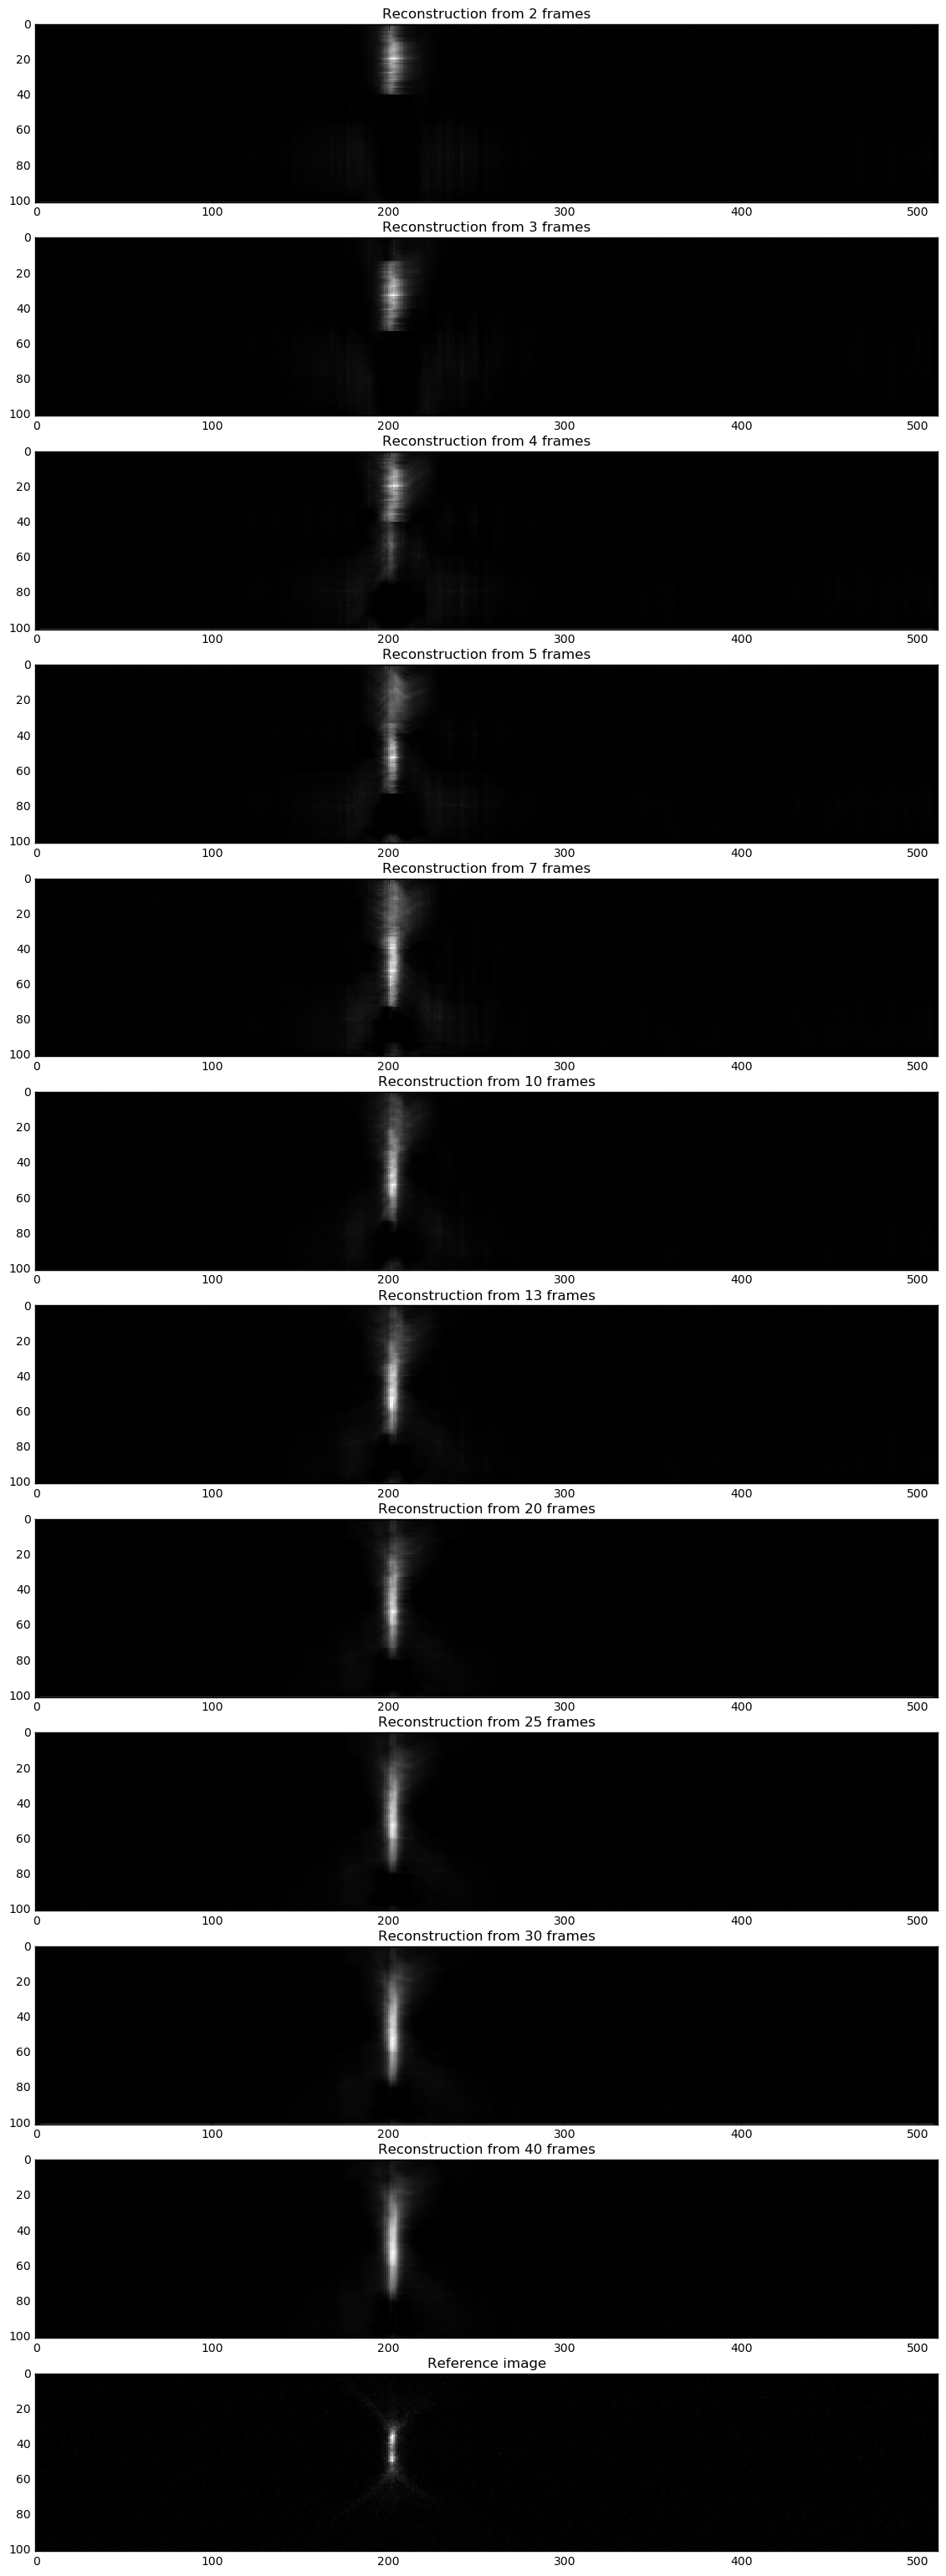

In [14]:
ix = cool_frames[0] #iy=254

plt.figure(figsize=(18, 3*(len(l_mes)+1)))

for (i,idx) in enumerate(l_mes):
    plt.subplot(len(l_mes), 1, i+1)
    plt.imshow(l_im[i][ix,:,:].T, cmap='gray', interpolation='none')
    plt.title("Reconstruction from {} frames".format(idx))
plt.imshow(ref[ix,:,:].T, cmap='gray', interpolation='none')
plt.title("Reference image")

# 2. Extract PSF close-ups and line profiles

Here the idea is to take two PSFs and see what happens when we degrade the compression ratio. The idea is also to compute line profiles in the $x$ and $z$ dimensions to get an idea of how things work.

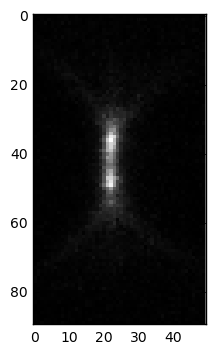

In [44]:
cu = [(126, 0, 90, 180, 230, 3)]
     #(232, 15, 40, 135, 175, 3)] # close-ups

def plot_closeup(tcu):
    """Plots a close-up of a PSF at various compression ratios"""
    plt.figure(figsize=(18,3*tcu[5]))
    plt.subplot(3,6,1)
    plt.imshow(ref[tcu[0],tcu[3]:tcu[4],tcu[1]:tcu[2]].T, cmap='gray', interpolation='none')
    plt.title("Reference")

    for i in range(len(l_mes)):
        plt.subplot(3,6,6+i+1)
        plt.imshow(l_im[-1*i-1][tcu[0],tcu[3]:tcu[4],tcu[1]:tcu[2]].T, cmap='gray', interpolation='none')
        plt.title("{} frames".format(l_mes[-1*i-1]))

tcu = cu[0] # this close-up
plt.imshow(ref[tcu[0],tcu[3]:tcu[4],tcu[1]:tcu[2]].T, cmap='gray', interpolation='none')
plt.imsave("figures/4.PSF0.png", ref[tcu[0],tcu[3]:tcu[4],tcu[1]:tcu[2]].T, cmap='gray')

#tcu = cu[0] # this close-up
#plt.imshow(ref[tcu[0],tcu[3]:tcu[4],tcu[1]:tcu[2]].T, cmap='gray', interpolation='none')
#plt.imsave("figures/3.PSF0.png", ref[tcu[0],tcu[3]:tcu[4],tcu[1]:tcu[2]].T)

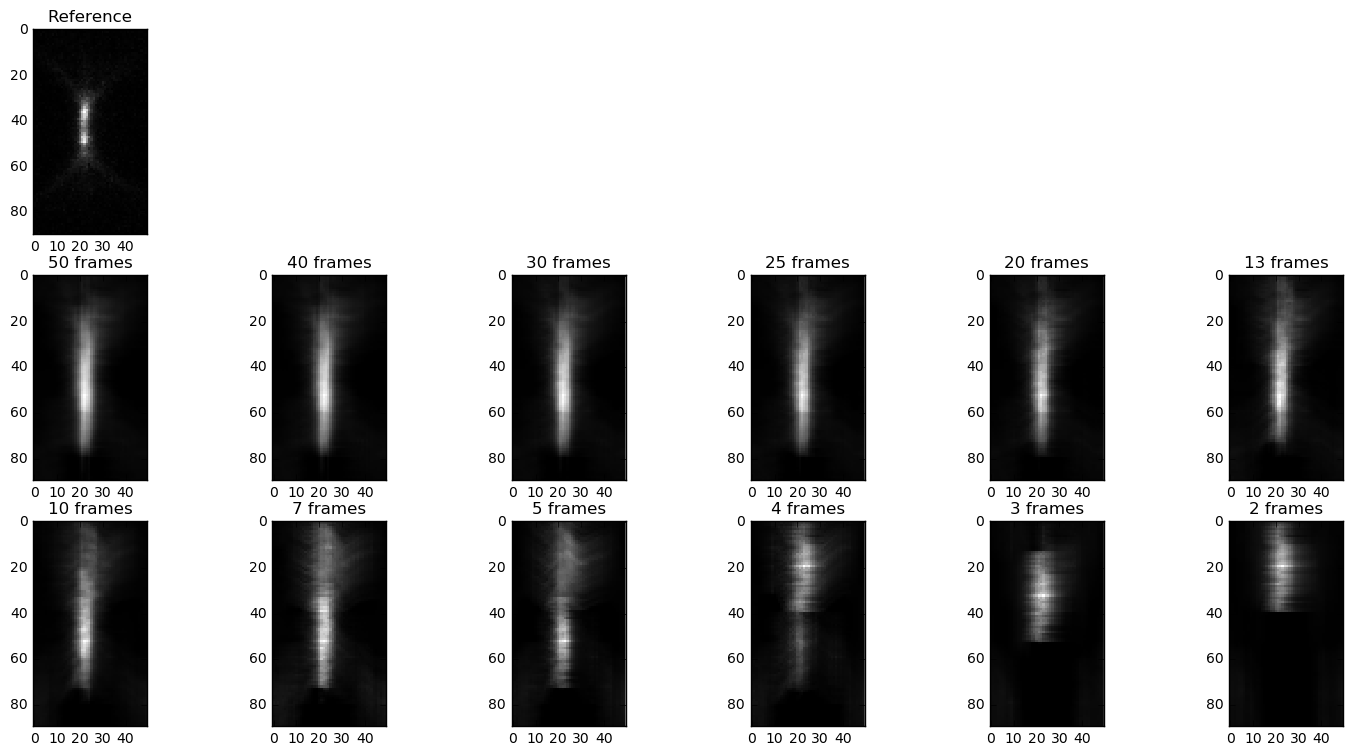

In [20]:
plot_closeup(cu[0])

In [72]:
def clr(i, cmap='viridis'):
    """Returns a viridis color"""
    cm = plt.cm.get_cmap(cmap)
    return cm(i)

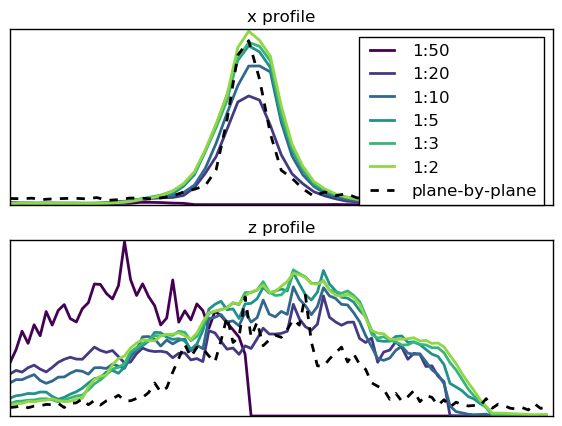

In [76]:
## Plot across z axis
shift = 0
pos_x = [45]
pos_z = [20]
ss = [0,3,5,7,9,11]
ss_comp = [101/l_mes[i] for i in ss]

plt.figure(figsize=(7,5))
for i in range(len(pos_x)):
    plt.subplot(2*len(pos_x), 1, i+1)
    tcu = cu[i]
    yref =ref[tcu[0],tcu[3]:tcu[4],tcu[1]:tcu[2]].T[(pos_x[i]-1):(pos_x[i]+1),:].mean(0)
    for (k,j) in enumerate(ss):
        y = l_im[j][tcu[0],tcu[3]:tcu[4],tcu[1]:tcu[2]].T[(pos_x[i]-1):(pos_x[i]+1),:].mean(0)
        plt.plot(y, color=clr(float(k)/len(ss)), linewidth=2, label="1:{}".format(ss_comp[k]))
    plt.title("x profile")
    plt.plot(np.arange(yref.shape[0])+shift, yref, '--', linewidth=2, color='black', label="plane-by-plane")    
plt.legend()
plt.yticks([]);plt.xticks([])    
    
for i in range(len(pos_x)):
    plt.subplot(2*len(pos_x), 1, 1+i+1)
    tcu = cu[i]
    yref = ref[tcu[0],tcu[3]:tcu[4],tcu[1]:tcu[2]].T[:,(pos_z[i]-1):(pos_z[i]+1)].mean(1)
    for (k,j) in enumerate(ss):
        y = l_im[j][tcu[0],tcu[3]:tcu[4],tcu[1]:tcu[2]].T[:,(pos_z[i]-1):(pos_z[i]+1)].mean(1)
        plt.plot(y, color=clr(float(k)/len(ss)), linewidth=2, label="{} frames".format(l_mes[j]))
    plt.plot(yref, '--', linewidth=2, color="black", label="plane-by-plane")    
    plt.title("z profile")
    plt.yticks([]);plt.xticks([])
plt.savefig("figures/4.profiles.pdf")


# 3. Compute MSE/SSIM as a function of the compression ratio

In [27]:
## Load indicators
from skimage.measure import structural_similarity as ssim
def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    # There is a bijection between PSNR and MSE: PSNR = 10*log(255*255/MSE) / log(10)
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

In [28]:
## Compute MSE, using the reconstruction with the lower compression reconstruction as a reference (the eye is too noisy)
## This code could be paralellized.

idx = l_im[-1].max(axis=(1,2))>0 ## Filter for higher intensity frames
l_imhigh = [im[idx,:,:] for im in l_im]


MSE = np.zeros((l_imhigh[0].shape[0],len(l_mes)))
SSIM = np.zeros((l_imhigh[0].shape[0],len(l_mes)))

for j in range(l_imhigh[0].shape[0]):
    if (j+1)%20 == 0:
        print "computing plane {}/{}".format(j+1, l_imhigh[0].shape[0])
    MSE[j,:] = [mse(l_imhigh[-1][j,:,:], l_imhigh[i][j,:,:]) for i in range(len(l_mes))]
    SSIM[j,:] = [ssim(l_imhigh[-1][j,:,:], l_imhigh[i][j,:,:]) for i in range(len(l_mes))]

/usr/local/lib/python2.7/dist-packages/skimage/util/shape.py:237: RuntimeWarning: Cannot provide views on a non-contiguous input array without copying.
  warn(RuntimeWarning("Cannot provide views on a non-contiguous input "


computing plane 20/512
computing plane 40/512
computing plane 60/512
computing plane 80/512
computing plane 100/512
computing plane 120/512
computing plane 140/512
computing plane 160/512
computing plane 180/512
computing plane 200/512
computing plane 220/512
computing plane 240/512
computing plane 260/512
computing plane 280/512
computing plane 300/512
computing plane 320/512
computing plane 340/512
computing plane 360/512
computing plane 380/512
computing plane 400/512
computing plane 420/512
computing plane 440/512
computing plane 460/512
computing plane 480/512
computing plane 500/512


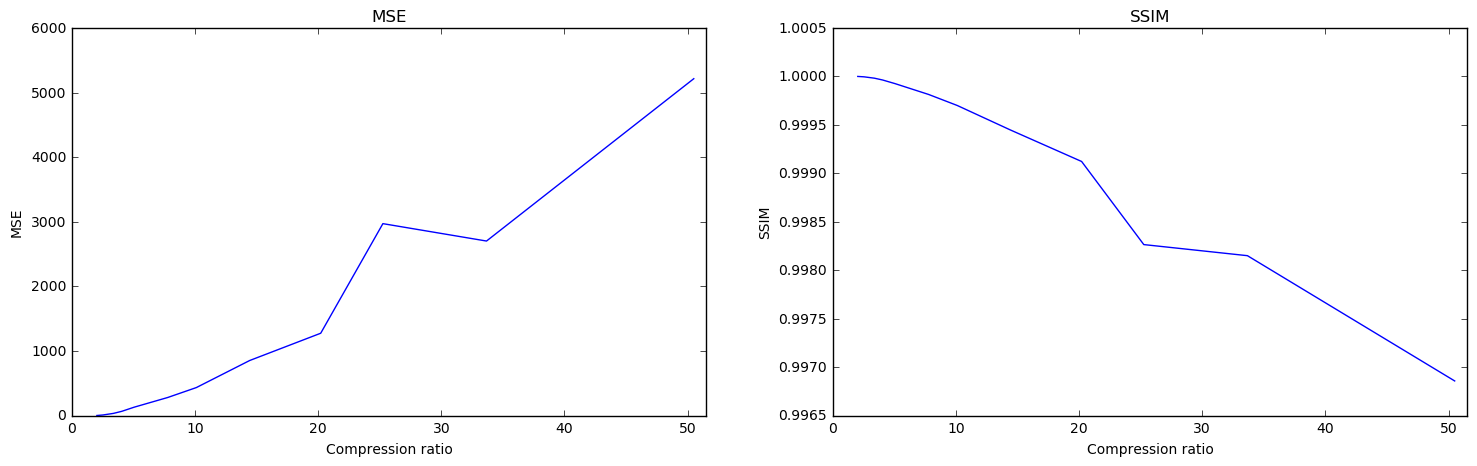

In [31]:
c_ratio = 101./np.array(l_mes) # Compression ratio

plt.figure(figsize=(18,5))
plt.subplot(121)
plt.plot(c_ratio, MSE.mean(0))
#plt.errorbar(c_ratio, MSE.mean(0), yerr=MSE.std(0))
plt.xlabel('Compression ratio')
plt.ylabel('MSE')
plt.xlim(0,max(c_ratio)+1)
plt.title("MSE")

plt.subplot(122)
plt.plot(c_ratio, SSIM.mean(0))
#plt.errorbar(c_ratio, SSIM.mean(0), yerr=SSIM.std(0))
plt.xlim(0,max(c_ratio)+1)
plt.xlabel('Compression ratio')
plt.ylabel('SSIM')
plt.title("SSIM")

# 4. Compute the frequency content of the image

In [47]:
l_mes

[2, 3, 4, 5, 7, 10, 13, 20, 25, 30, 40, 50]

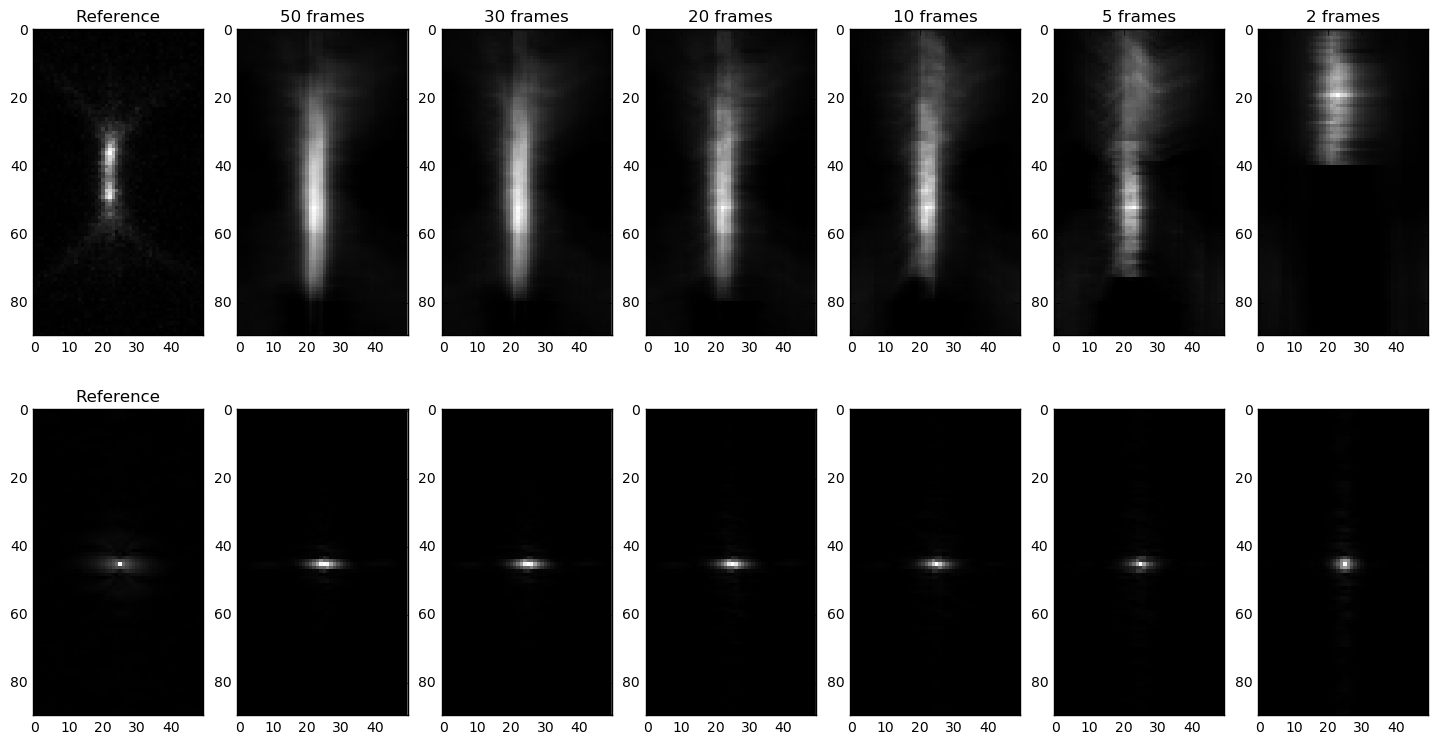

In [48]:
## From http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html#fourier-transform-in-numpy
def get_fft(img):
    """Returns the FFT of a 2D image"""
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = np.abs(fshift) #20*np.log(np.abs(fshift)) # 
    return magnitude_spectrum

ss = [0,3,5,7,9,11]
cf = cool_frames[0]
pos_z = [0,90]
pos_x = [180,  230]

plt.figure(figsize=(18,9))

img=ref
plt.subplot(2, len(ss)+1,  1)
plt.imshow(img[cf,pos_x[0]:pos_x[1],pos_z[0]:pos_z[1]].T, interpolation='none', cmap = 'gray')
plt.imsave("./figures/4.PSFcloseup_{}frames.png".format("reference"), img[cf,pos_x[0]:pos_x[1],pos_z[0]:pos_z[1]].T, cmap='gray')

plt.title("Reference")
plt.subplot(2, len(ss)+1, len(ss)+1+1)
yref = img[cf,pos_x[0]:pos_x[1],pos_z[0]:pos_z[1]].T
ff=get_fft(yref)
plt.imshow(ff, cmap = 'gray', interpolation='none', vmin=0, vmax=ff.max())
plt.imsave("./figures/4.PSFcloseupFFT_{}frames.png".format("reference"), ff, cmap='gray', vmin=0, vmax=ff.max())

#plt.colorbar(orientation='horizontal', shrink=.8)
plt.title("Reference")

for (i,j) in enumerate(ss[::-1]):
    img=l_im[j]
    plt.subplot(2, len(ss)+1, i+2)
    plt.imshow(img[cf,pos_x[0]:pos_x[1],pos_z[0]:pos_z[1]].T, interpolation='none', cmap = 'gray')
    plt.imsave("./figures/4.PSFcloseup_{}frames.png".format(l_mes[j]), img[cf,pos_x[0]:pos_x[1],pos_z[0]:pos_z[1]].T, cmap='gray')
    plt.title("{} frames".format(l_mes[j]))
    plt.subplot(2, len(ss)+1, len(ss)+1+i+2)
    plt.imshow(get_fft(img[cf,pos_x[0]:pos_x[1],pos_z[0]:pos_z[1]].T), cmap = 'gray', interpolation='none', vmin=0, vmax=ff.max())
    plt.imsave("./figures/4.PSFcloseupFFT_{}frames.png".format(l_mes[j]), get_fft(img[cf,pos_x[0]:pos_x[1],pos_z[0]:pos_z[1]].T), vmin=0, vmax=ff.max(), cmap='gray')
    #plt.title("{} frames".format(l_mes[j]))
    #plt.colorbar(orientation='horizontal', shrink=.8)
plt.savefig("./figures/4.FFTanalysis.png", dpi=300)

In [36]:
print img[cf].shape
img[cf,pos_x[0]:pos_x[1],pos_z[0]:pos_z[1]].T

(512, 101)


array([], shape=(0, 90), dtype=uint16)